In the first step we created a new dataframe that contains the metrics we want for our model only for 
numerical variables
Before we examine what we metrics we can take from categorical variables let's see an example of 
linear regression using the sklearn module for our numerical variables

In [1]:
#first we must import the relevant libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [2]:
%matplotlib inline

In [5]:
raw_data = pd.read_csv("final_metrics.csv")

In [6]:
raw_data

Unnamed: 0     25%       50%        75% alphabetic  average length  \
0         job     NaN       NaN        NaN      False        9.485546   
1         job     NaN       NaN        NaN      False        9.485546   
2     marital     NaN       NaN        NaN       True        6.832275   
3   education     NaN       NaN        NaN       True        8.320586   
4       month     NaN       NaN        NaN       True        3.000000   
..        ...     ...       ...        ...        ...             ...   
67         50  0.9956   0.99675   0.997835        NaN             NaN   
68         51  3.2100   3.31000   3.400000        NaN             NaN   
69         52  0.5500   0.62000   0.730000        NaN             NaN   
70         53  9.5000  10.20000  11.100000        NaN             NaN   
71         54  5.0000   6.00000   6.000000        NaN             NaN   

      count decimal  digit     freq  ...      min    mode    range  sensitive  \
0   45211.0   False  False   9732.0  ...      NaN     NaN      NaN        1.0   
1   45211.0   False  False   9732.0  ...      NaN     NaN      NaN        1.0   
2   45211.0   False  False  27214.0  ...      NaN     NaN      NaN        1.0   
3   45211.0   False  False  23202.0  ...      NaN     NaN      NaN        1.0   
4   45211.0   False  False  13766.0  ...      NaN     NaN      NaN        0.0   
..      ...     ...    ...      ...  ...      ...     ...      ...        ...   
67   1599.0     NaN    NaN      NaN  ...  0.99007  0.9972  0.01362        0.4   
68   1599.0     NaN    NaN      NaN  ...  2.74000  3.3000  1.27000        0.4   
69   1599.0     NaN    NaN      NaN  ...  0.33000  0.6000  1.67000        0.4   
70   1599.0     NaN    NaN      NaN  ...  8.40000  9.5000  6.50000        0.4   
71   1599.0     NaN    NaN      NaN  ...  3.00000  5.0000  5.00000        0.4   

         std  title          top  unique  uppercase  variance  
0        NaN  False  blue-collar    12.0      False       NaN  
1        NaN  False  blue-collar    12.0      False       NaN  
2        NaN  False      married     3.0      False       NaN  
3        NaN  False    secondary     4.0      False       NaN  
4        NaN  False          may    12.0      False       NaN  
..       ...    ...          ...     ...        ...       ...  
67  0.001887    NaN          NaN     NaN        NaN  0.000004  
68  0.154386    NaN          NaN     NaN        NaN  0.023835  
69  0.169507    NaN          NaN     NaN        NaN  0.028733  
70  1.065668    NaN          NaN     NaN        NaN  1.135647  
71  0.807569    NaN          NaN     NaN        NaN  0.652168  

[72 rows x 26 columns]

In [7]:
raw_data = raw_data.drop('top', axis=1)

In [8]:
raw_data = raw_data.drop('Unnamed: 0', axis = 1)

In [9]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 24 columns):
25%               55 non-null float64
50%               55 non-null float64
75%               55 non-null float64
alphabetic        17 non-null object
average length    17 non-null float64
count             72 non-null float64
decimal           17 non-null object
digit             17 non-null object
freq              17 non-null float64
isnum             17 non-null object
isspace           17 non-null object
lowercase         17 non-null object
max               55 non-null float64
mean              55 non-null float64
median            55 non-null float64
min               55 non-null float64
mode              55 non-null float64
range             54 non-null float64
sensitive         72 non-null float64
std               55 non-null float64
title             17 non-null object
unique            17 non-null float64
uppercase         17 non-null object
variance          55 non-null f

In [10]:
raw_data =  raw_data.fillna(raw_data.mean())

Linear Regression Model

In [11]:
#declare inputs and targets
# The target(s) (dependent variable) is 'sensitive'
targets = raw_data['sensitive']

# The inputs are everything BUT the dependent variable, so we can simply drop it
inputs = raw_data.drop(['sensitive'],axis=1)

Scale the data

In [12]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [13]:
# Scale the features and store them in a new variable (the actual scaling procedure)
inputs_scaled = scaler.transform(inputs)

In [14]:
# Import the module for the split
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
# To have the same split as mine, use random_state = 365
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

In [15]:
# Create a linear regression object
reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
# Let's check the outputs of the regression
# I'll store them in y_hat as this is the 'theoretical' name of the predictions
y_hat = reg.predict(x_train)
y_hat

array([0.30460958, 0.31487747, 0.28980547, 0.31853804, 0.30461364,
       0.56468769, 0.66794422, 0.82966762, 0.63360113, 0.48913515,
       0.44247229, 0.31464349, 0.29301504, 0.87599083, 0.32876362,
       0.67159012, 0.31513932, 0.30519206, 0.31025422, 0.8211986 ,
       0.76942062, 0.31684052, 0.50849269, 0.7951556 , 0.46176019,
       0.31673984, 0.3396981 , 0.30418573, 0.31131702, 0.35217229,
       0.60073023, 0.45264819, 0.31391635, 0.26990338, 0.66794422,
       0.30915569, 0.88583349, 0.45262183, 0.43274587, 0.73515822,
       0.62210753, 1.00993378, 0.3023106 , 0.30519394, 0.48503592,
       0.29144312, 0.32999719, 0.31264794, 0.41252882, 0.30146156,
       0.30291884, 0.30984617, 0.31237401, 0.49761382, 0.45860506,
       0.30480487, 0.29899714])

In [17]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, y_hat)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
# Sometimes the plot will have different scales of the x-axis and the y-axis
# This is an issue as we won't be able to interpret the '45-degree line'
# We want the x-axis and the y-axis to be the same
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

In [18]:
df_p = pd.DataFrame(y_hat, columns=['Prediction'])

In [19]:
df_p['Target'] = y_train

In [20]:
df_p.head(20)

Prediction  Target
0     0.304610     1.0
1     0.314877     1.0
2     0.289805     NaN
3     0.318538     1.0
4     0.304614     NaN
5     0.564688     1.0
6     0.667944     1.0
7     0.829668     0.0
8     0.633601     0.0
9     0.489135     1.0
10    0.442472     1.0
11    0.314643     1.0
12    0.293015     1.0
13    0.875991     1.0
14    0.328764     NaN
15    0.671590     1.0
16    0.315139     1.0
17    0.305192     0.7
18    0.310254     0.3
19    0.821199     NaN

In [21]:
# Another useful check of our model is a residual plot
# We can plot the PDF of the residuals and check for anomalies
sns.distplot(y_train - y_hat)

# Include a title
plt.title("Residuals PDF", size=18)

# In the best case scenario this plot should be normally distributed
# In our case we notice that there are many negative residuals (far away from the mean)
# Given the definition of the residuals (y_train - y_hat), negative values imply
# that y_hat (predictions) are much higher than y_train (the targets)
# This is food for thought to improve our model

Text(0.5, 1.0, 'Residuals PDF')

In [22]:
# Find the R-squared of the model
reg.score(x_train,y_train)

# Note that this is NOT the adjusted R-squared
# in other words... find the Adjusted R-squared to have the appropriate measure :)

0.39932112196538116

In [23]:
# Obtain the bias (intercept) of the regression
reg.intercept_

0.4614925307512856

In [24]:
# Obtain the weights (coefficients) of the regression
reg.coef_

# Note that they are barely interpretable if at all

array([ 1.33613001e+01, -8.18174919e+01,  3.09794791e+02,  4.91916822e-02,
        4.41415880e-02,  1.86867088e-01, -4.16164880e-11, -5.75610670e-11,
       -1.06823606e-01, -3.79074550e-12, -1.47899470e-11, -2.74719908e-02,
        4.70077752e+01, -1.20214828e+02, -8.18174919e+01,  5.42988559e+00,
       -4.98049706e-02,  5.92295100e-01, -3.21430377e+01,  3.17083073e-02,
        3.19189547e-02,  6.68911357e-02, -5.92251349e+01])

In [25]:
# Create a regression summary where we can compare them with one-another
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

Features       Weights
0              25%  1.336130e+01
1              50% -8.181749e+01
2              75%  3.097948e+02
3       alphabetic  4.919168e-02
4   average length  4.414159e-02
5            count  1.868671e-01
6          decimal -4.161649e-11
7            digit -5.756107e-11
8             freq -1.068236e-01
9            isnum -3.790745e-12
10         isspace -1.478995e-11
11       lowercase -2.747199e-02
12             max  4.700778e+01
13            mean -1.202148e+02
14          median -8.181749e+01
15             min  5.429886e+00
16            mode -4.980497e-02
17           range  5.922951e-01
18             std -3.214304e+01
19           title  3.170831e-02
20          unique  3.191895e-02
21       uppercase  6.689114e-02
22        variance -5.922513e+01

TEST

In [26]:
# Once we have trained and fine-tuned our model, we can proceed to testing it
# Testing is done on a dataset that the algorithm has never seen
# Luckily we have prepared such a dataset
# Our test inputs are 'x_test', while the outputs: 'y_test' 
# We SHOULD NOT TRAIN THE MODEL ON THEM, we just feed them and find the predictions
# If the predictions are far off, we will know that our model overfitted
y_hat_test = reg.predict(x_test)

In [27]:
# Create a scatter plot with the test targets and the test predictions
# You can include the argument 'alpha' which will introduce opacity to the graph
plt.scatter(y_test, y_hat_test)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

In [28]:
# Finally, let's manually check these predictions
# To obtain the actual sensitive values:
df_pf = pd.DataFrame(y_hat_test, columns=['Prediction'])
df_pf

Prediction
0     0.309228
1     0.588162
2     0.302845
3     0.322082
4     0.313993
5     0.332465
6     0.314463
7     2.069376
8     0.297107
9     0.519010
10    0.314021
11    0.341894
12    0.307751
13    0.741605
14    0.303459

In [29]:
# We can also include the test targets in that data frame (so we can manually compare them)
df_pf['Target'] = y_test
df_pf

# Note that we have a lot of missing values
# There is no reason to have ANY missing values, though
# This suggests that something is wrong with the data frame / indexing

Prediction  Target
0     0.309228     NaN
1     0.588162     NaN
2     0.302845     1.0
3     0.322082     NaN
4     0.313993     0.0
5     0.332465     NaN
6     0.314463     NaN
7     2.069376     NaN
8     0.297107     NaN
9     0.519010     NaN
10    0.314021     NaN
11    0.341894     NaN
12    0.307751     NaN
13    0.741605     NaN
14    0.303459     1.0

In [30]:
# After displaying y_test, we find what the issue is
# The old indexes are preserved (recall earlier in that code we made a note on that)
# The code was: data_cleaned = data_4.reset_index(drop=True)

# Therefore, to get a proper result, we must reset the index and drop the old indexing
y_test = y_test.reset_index(drop=True)

# Check the result
y_test.head()

0    0.4
1    0.0
2    0.4
3    0.4
4    0.4
Name: sensitive, dtype: float64

In [31]:
# Let's overwrite the 'Target' column with the appropriate values
# Again, we need the exponential of the test log sensitive
df_pf['Target'] = (y_test)
df_pf

Prediction  Target
0     0.309228    0.40
1     0.588162    0.00
2     0.302845    0.40
3     0.322082    0.40
4     0.313993    0.40
5     0.332465    0.25
6     0.314463    0.40
7     2.069376    0.20
8     0.297107    0.20
9     0.519010    1.00
10    0.314021    0.40
11    0.341894    1.00
12    0.307751    0.20
13    0.741605    0.40
14    0.303459    0.25

In [32]:
# Additionally, we can calculate the difference between the targets and the predictions
# Note that this is actually the residual (we already plotted the residuals)
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

# Since OLS is basically an algorithm which minimizes the total sum of squared errors (residuals),
# this comparison makes a lot of sense

In [33]:
# Finally, it makes sense to see how far off we are from the result percentage-wise
# Here, we take the absolute difference in %, so we can easily order the data frame
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

Prediction  Target  Residual  Difference%
0     0.309228    0.40  0.090772    22.693100
1     0.588162    0.00 -0.588162          inf
2     0.302845    0.40  0.097155    24.288632
3     0.322082    0.40  0.077918    19.479591
4     0.313993    0.40  0.086007    21.501649
5     0.332465    0.25 -0.082465    32.985920
6     0.314463    0.40  0.085537    21.384348
7     2.069376    0.20 -1.869376   934.687997
8     0.297107    0.20 -0.097107    48.553442
9     0.519010    1.00  0.480990    48.098966
10    0.314021    0.40  0.085979    21.494642
11    0.341894    1.00  0.658106    65.810583
12    0.307751    0.20 -0.107751    53.875513
13    0.741605    0.40 -0.341605    85.401369
14    0.303459    0.25 -0.053459    21.383693

In [34]:
# Exploring the descriptives here gives us additional insights
df_pf.describe()

Prediction     Target   Residual  Difference%
count   15.000000  15.000000  15.000000    15.000000
mean     0.491831   0.393333  -0.098497          inf
std      0.455819   0.273121   0.570255          NaN
min      0.297107   0.000000  -1.869376    19.479591
25%      0.308489   0.225000  -0.102429    21.498145
50%      0.314463   0.400000   0.077918    32.985920
75%      0.430452   0.400000   0.088389    59.843048
max      2.069376   1.000000   0.658106          inf

In [35]:
# Sometimes it is useful to check these outputs manually
# To see all rows, we use the relevant pandas syntax
pd.options.display.max_rows = 999
# Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finally, we sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

Prediction  Target  Residual  Difference%
3         0.32    0.40      0.08        19.48
14        0.30    0.25     -0.05        21.38
6         0.31    0.40      0.09        21.38
10        0.31    0.40      0.09        21.49
4         0.31    0.40      0.09        21.50
0         0.31    0.40      0.09        22.69
2         0.30    0.40      0.10        24.29
5         0.33    0.25     -0.08        32.99
9         0.52    1.00      0.48        48.10
8         0.30    0.20     -0.10        48.55
12        0.31    0.20     -0.11        53.88
11        0.34    1.00      0.66        65.81
13        0.74    0.40     -0.34        85.40
7         2.07    0.20     -1.87       934.69
1         0.59    0.00     -0.59          inf

In [36]:
from sklearn import metrics

In [37]:
metrics.mean_absolute_error(y_test,y_hat_test)##MAE

0.3201592595757779

In [38]:
metrics.mean_squared_error(y_test,y_hat_test) ##MSE

0.3132136210138443

In [39]:
np.sqrt(metrics.mean_squared_error(y_test,y_hat_test)) ##RMSE

0.5596549124360871

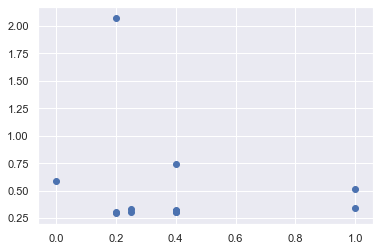

In [40]:
plt.scatter(y_test, y_hat_test)

In [41]:
sns.distplot(y_test-y_hat_test)

So far we trained our linear regression model. Lets save the model so we can use it later to predict sensitive variables on untrained dataset

In [42]:
import pickle

In [43]:
with open('model_pickle', 'wb') as f:
    pickle.dump(reg,f)

now that we saved our model we can use it to predict untrained data 
the inputs must be the same 